## Puzzle 1: Map

In [2]:
import numba
import numpy as np
import warnings
from lib import CudaProblem, Coord

In [3]:
warnings.filterwarnings(
    action="ignore", category=numba.NumbaPerformanceWarning, module="numba"
)

# Map
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



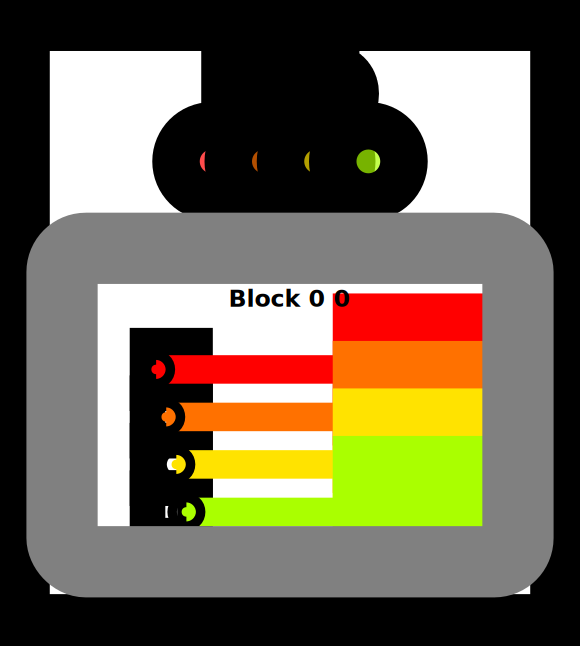

In [4]:
def map_spec(a):
    return a + 10

def map_test(cuda):
    def call(out, a) -> None:
        local_i = cuda.threadIdx.x
        out[local_i] = a[local_i] + 10

    return call


SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Map", map_test, [a], out, threadsperblock=Coord(SIZE, 1), spec=map_spec
)
problem.show()

In [5]:
problem.check()

Passed Tests!


## Puzzle 2: Zip

# Zip
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             2 |             1 |             0 |             0 | 



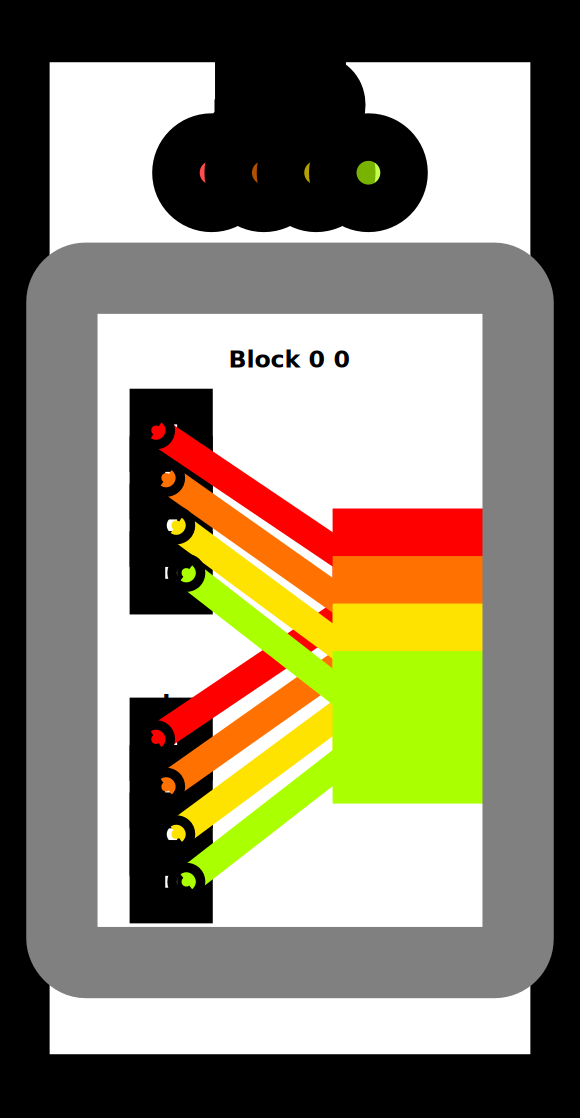

In [6]:
def zip_spec(a, b):
    return a + b


def zip_test(cuda):
    def call(out, a, b) -> None:
        local_i = cuda.threadIdx.x
        out[local_i] = a[local_i] + b[local_i]
        # FILL ME IN (roughly 1 lines)

    return call


SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
b = np.arange(SIZE)
problem = CudaProblem(
    "Zip", zip_test, [a, b], out, threadsperblock=Coord(SIZE, 1), spec=zip_spec
)
problem.show()

In [7]:
problem.check()

Passed Tests!


## Puzzle 3 - Guards

# Guard
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



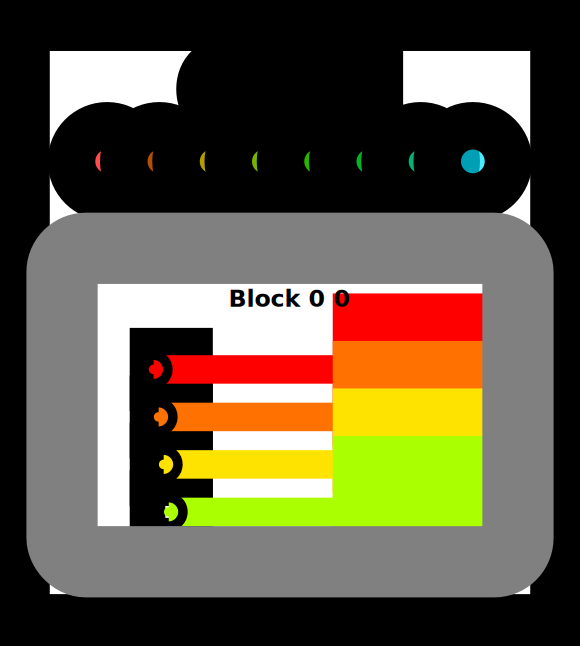

In [8]:
def map_guard_test(cuda):
    def call(out, a, size) -> None:
        local_i = cuda.threadIdx.x
        if local_i < size:
            out[local_i] = a[local_i] + 10

    return call


SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Guard",
    map_guard_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(8, 1),
    spec=map_spec,
)
problem.show()

In [9]:
problem.check()

Passed Tests!


## Puzzle 4 - Map 2D

# Map 2D
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



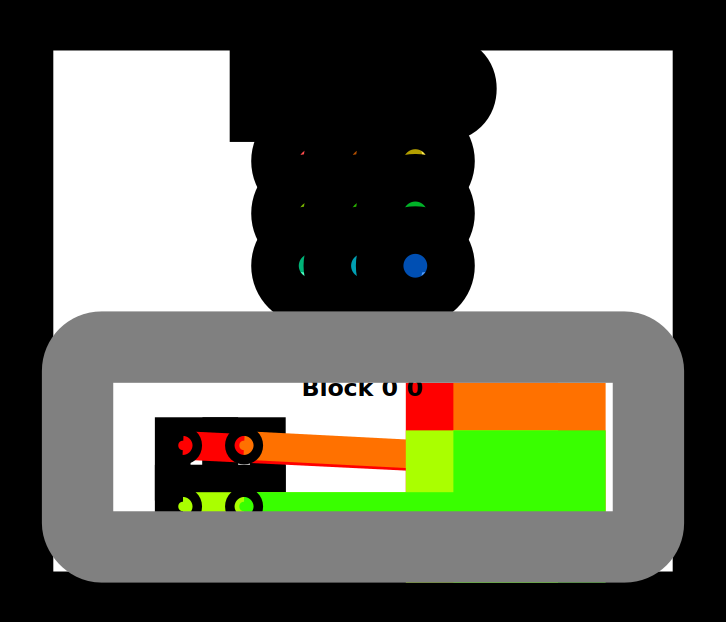

In [10]:
def map_2D_test(cuda):
    def call(out, a, size) -> None:
        local_i = cuda.threadIdx.x
        local_j = cuda.threadIdx.y
        if local_i < size and local_j < size:
            out[local_i, local_j] = a[local_i, local_j] + 10

    return call


SIZE = 2
out = np.zeros((SIZE, SIZE))
a = np.arange(SIZE * SIZE).reshape((SIZE, SIZE))
problem = CudaProblem(
    "Map 2D", map_2D_test, [a], out, [SIZE], threadsperblock=Coord(3, 3), spec=map_spec
)
problem.show()

In [11]:
problem.check()

Passed Tests!


## Puzzle 5 - Broadcast

# Broadcast
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             2 |             1 |             0 |             0 | 



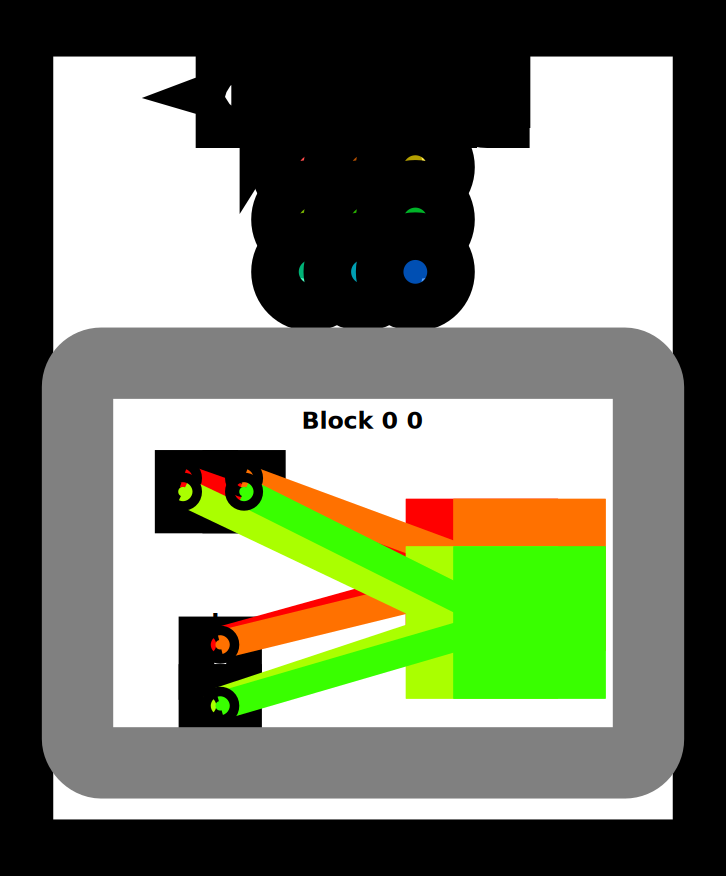

In [12]:
def broadcast_test(cuda):
    def call(out, a, b, size) -> None:
        local_i = cuda.threadIdx.x
        local_j = cuda.threadIdx.y
        if local_i < size and local_j < size:
            out[local_i, local_j] = a[local_i, 0] + b[0, local_j]

    return call


SIZE = 2
out = np.zeros((SIZE, SIZE))
a = np.arange(SIZE).reshape(SIZE, 1)
b = np.arange(SIZE).reshape(1, SIZE)
problem = CudaProblem(
    "Broadcast",
    broadcast_test,
    [a, b],
    out,
    [SIZE],
    threadsperblock=Coord(3, 3),
    spec=zip_spec,
)
problem.show()

In [13]:
problem.check()

Passed Tests!


## Puzzle 6 - Blocks

# Blocks
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



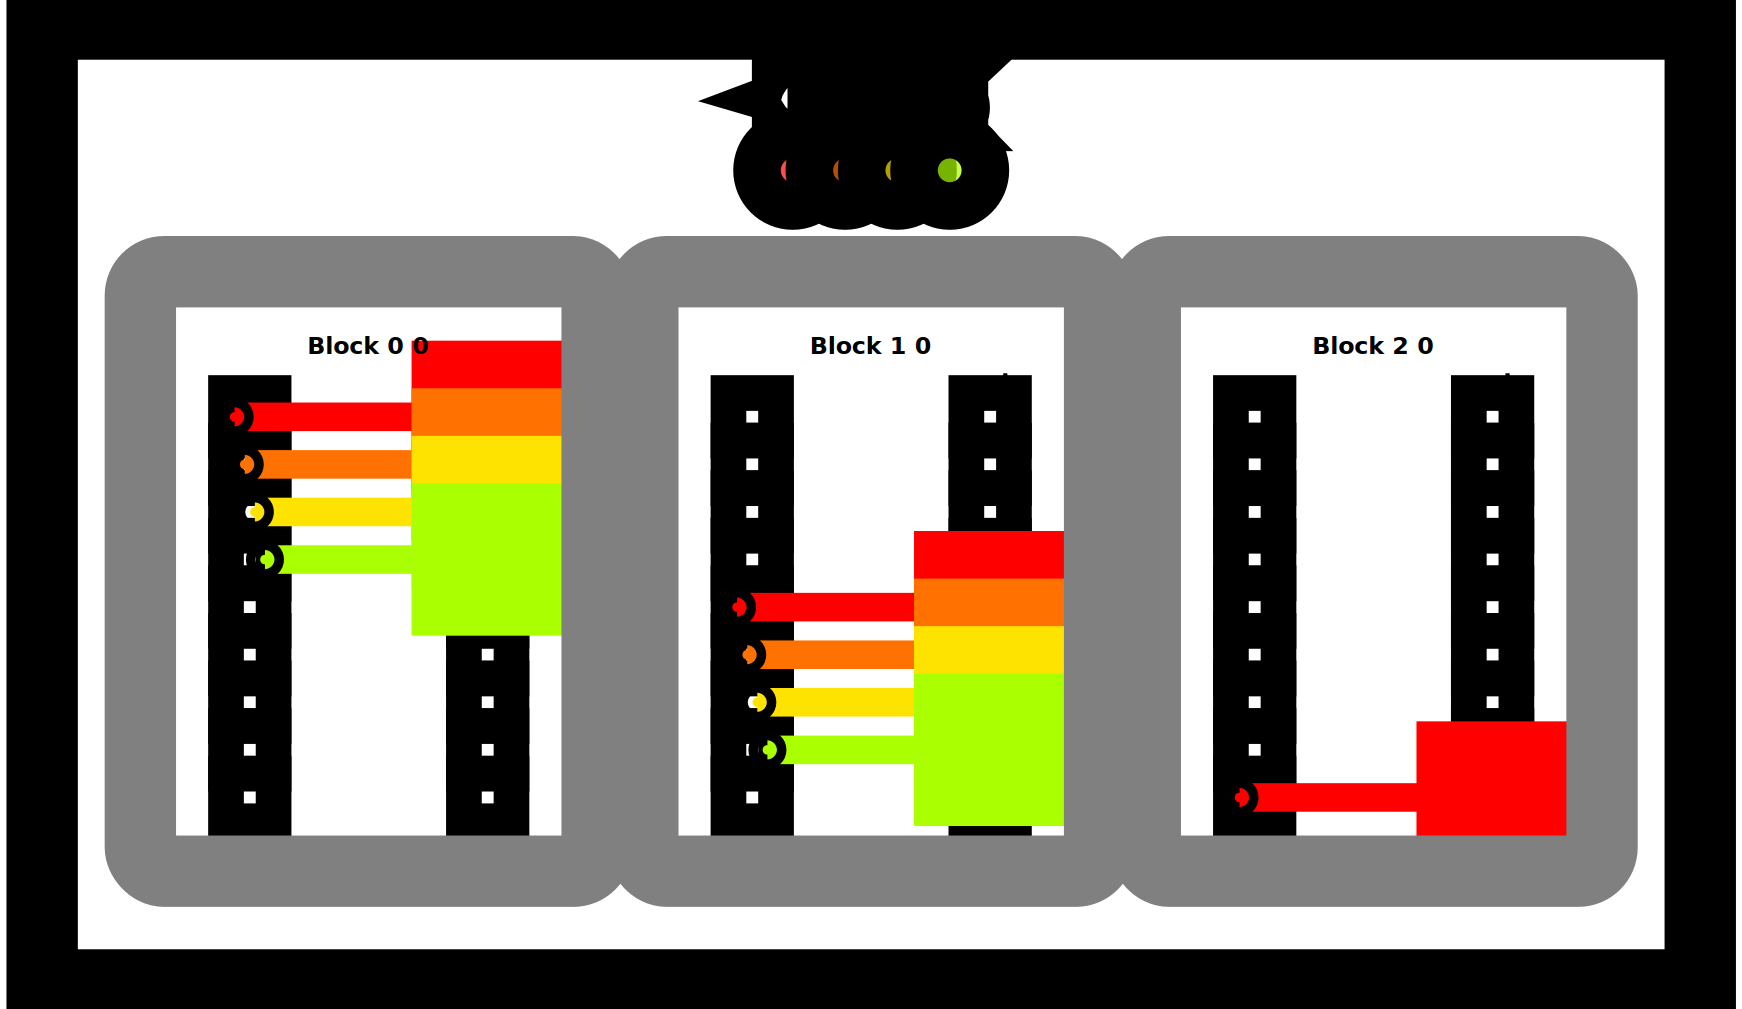

In [14]:
def map_block_test(cuda):
    def call(out, a, size) -> None:
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        if i < size:
            out[i] = a[i] + 10

    return call


SIZE = 9
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Blocks",
    map_block_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(4, 1),
    blockspergrid=Coord(3, 1),
    spec=map_spec,
)
problem.show()

In [15]:
problem.check()

Passed Tests!


## Puzzle 7 - Blocks 2D

# Blocks 2D
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



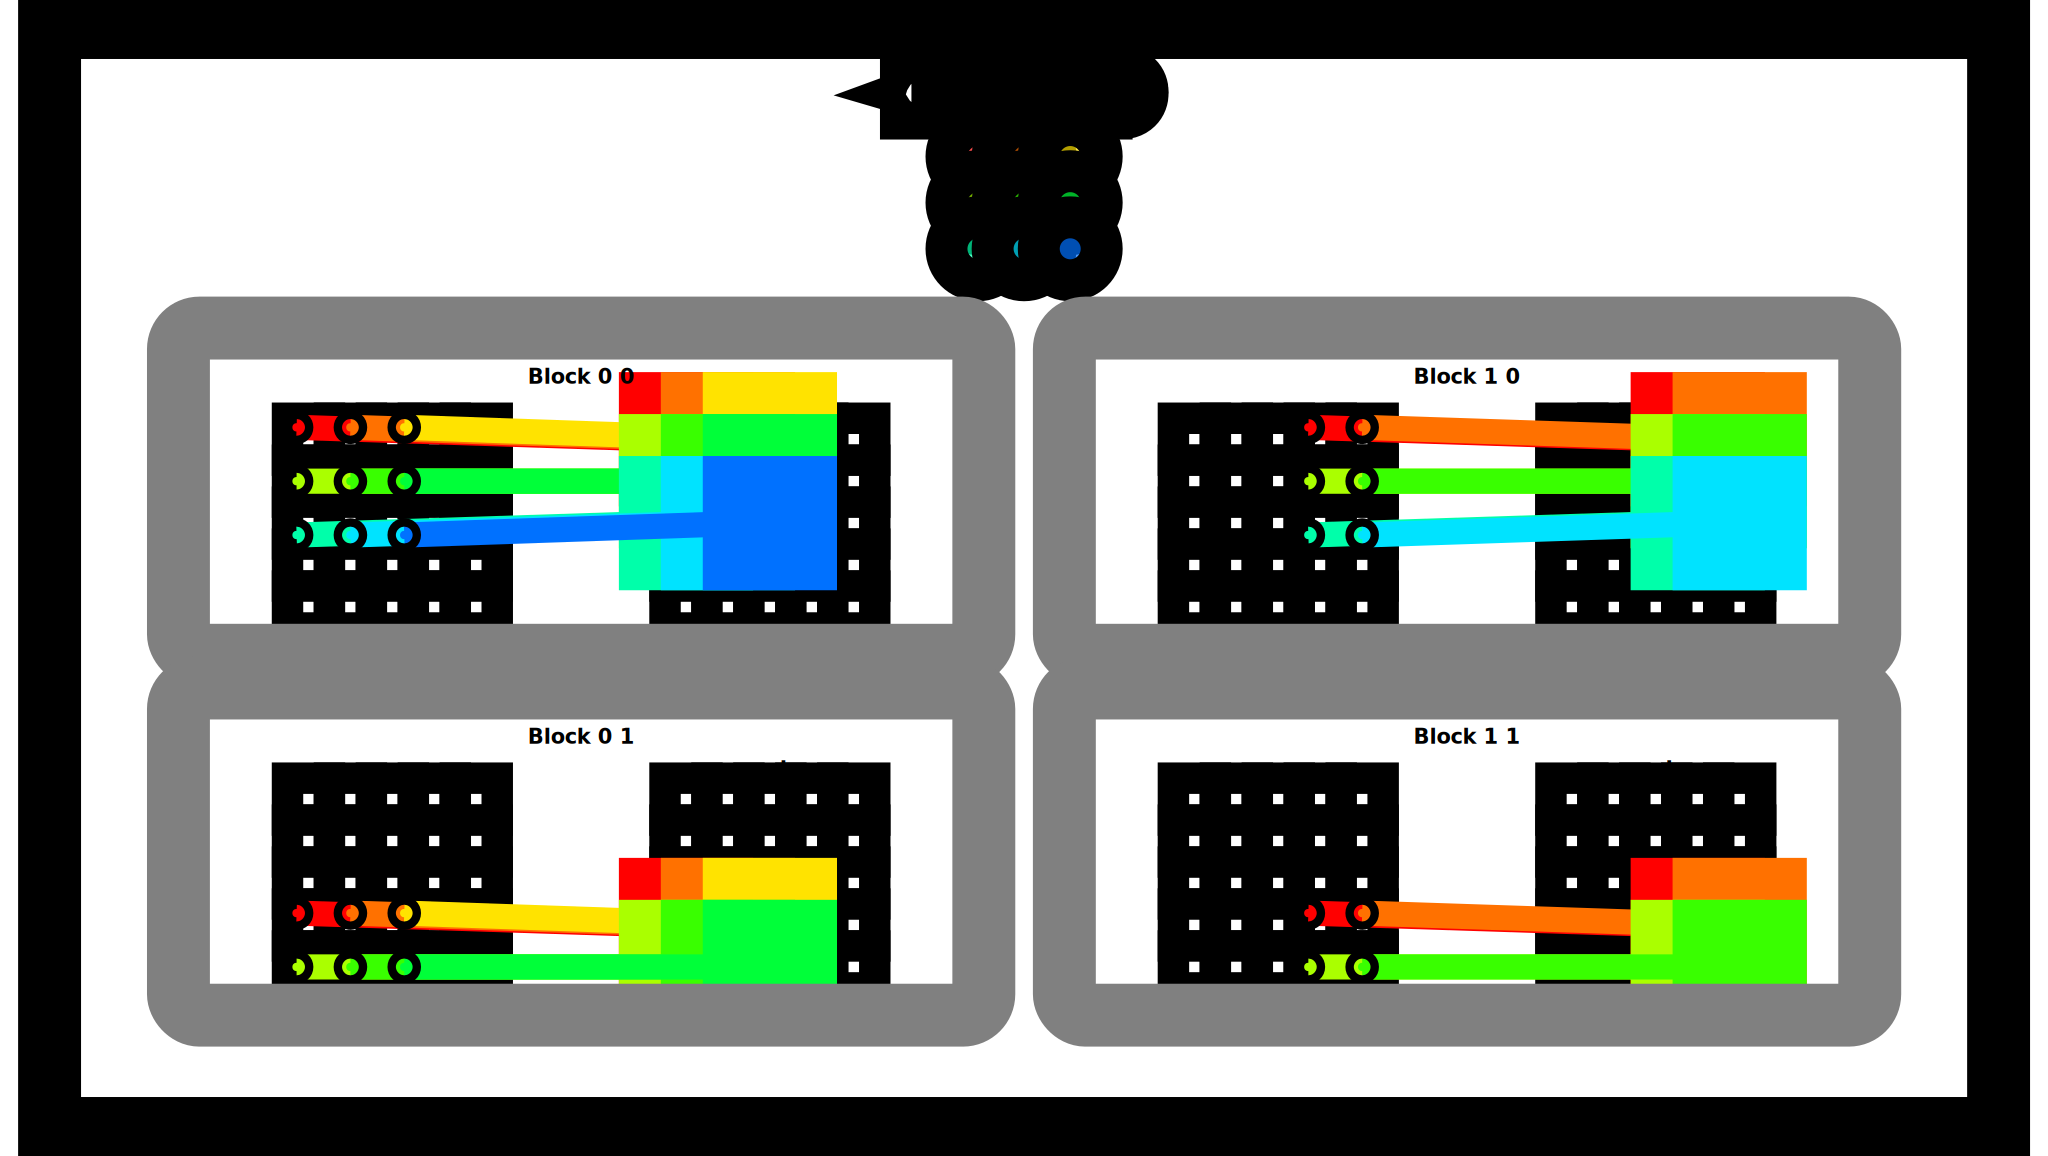

In [16]:
def map_block2D_test(cuda):
    def call(out, a, size) -> None:
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        j = cuda.blockIdx.y * cuda.blockDim.y + cuda.threadIdx.y
        if i < size and j < size:
            out[i, j] = a[i, j] + 10

    return call


SIZE = 5
out = np.zeros((SIZE, SIZE))
a = np.ones((SIZE, SIZE))

problem = CudaProblem(
    "Blocks 2D",
    map_block2D_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(3, 3),
    blockspergrid=Coord(2, 2),
    spec=map_spec,
)
problem.show()

In [17]:
problem.check()

Passed Tests!


## Puzzle 8 - Shared

# Shared
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             1 |             1 | 



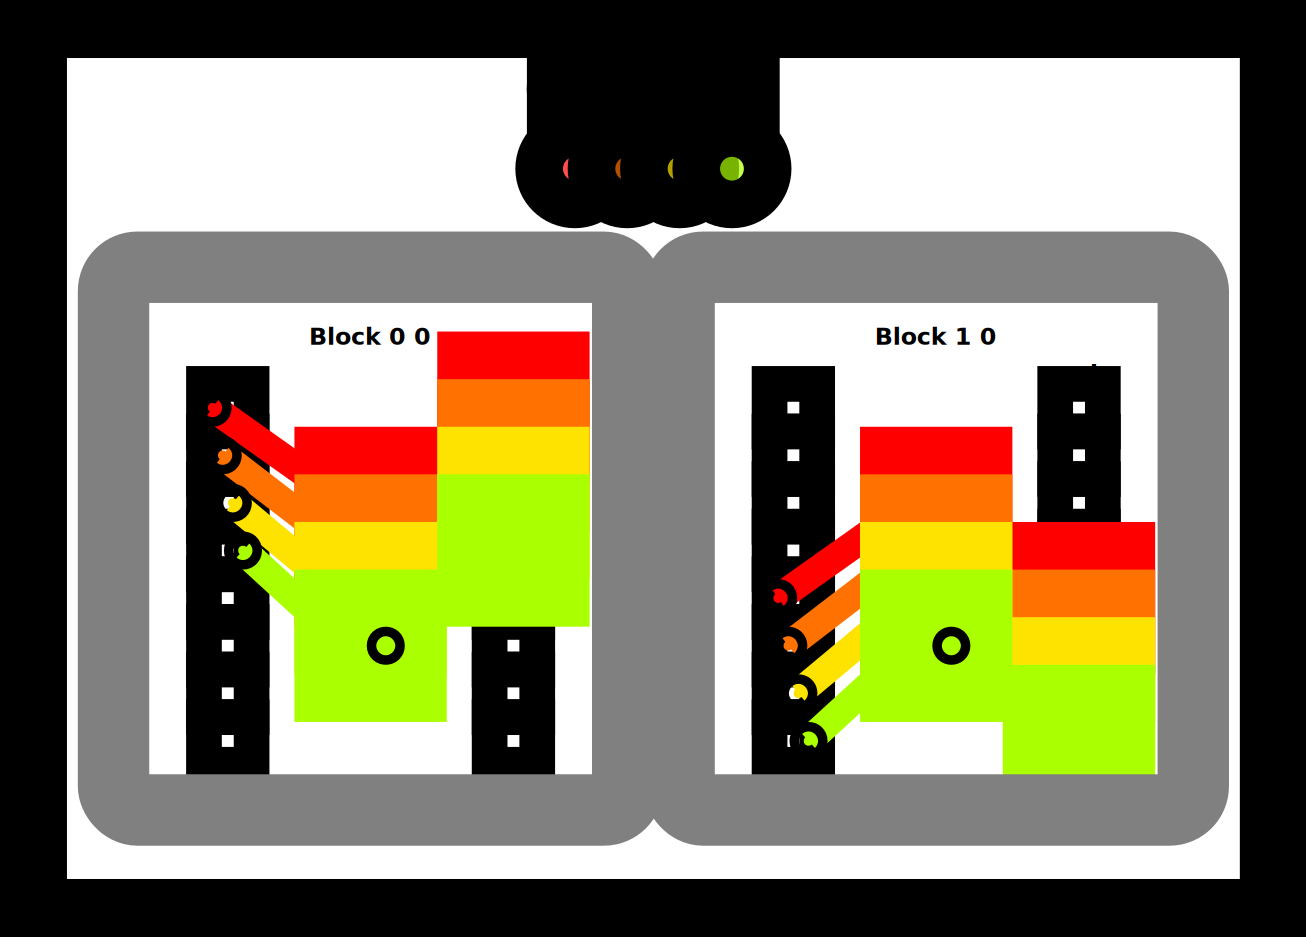

In [18]:
TPB = 4
def shared_test(cuda):
    def call(out, a, size) -> None:
        shared = cuda.shared.array(TPB, numba.float32)
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x

        if i < size:
            shared[local_i] = a[i]
            cuda.syncthreads()

        if i < size:
            out[i] = shared[local_i] + 10

    return call


SIZE = 8
out = np.zeros(SIZE)
a = np.ones(SIZE)
problem = CudaProblem(
    "Shared",
    shared_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(TPB, 1),
    blockspergrid=Coord(2, 1),
    spec=map_spec,
)
problem.show()

In [19]:
problem.check()

Passed Tests!


## Puzzle 9 - Pooling

# Pooling
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             3 |             1 | 



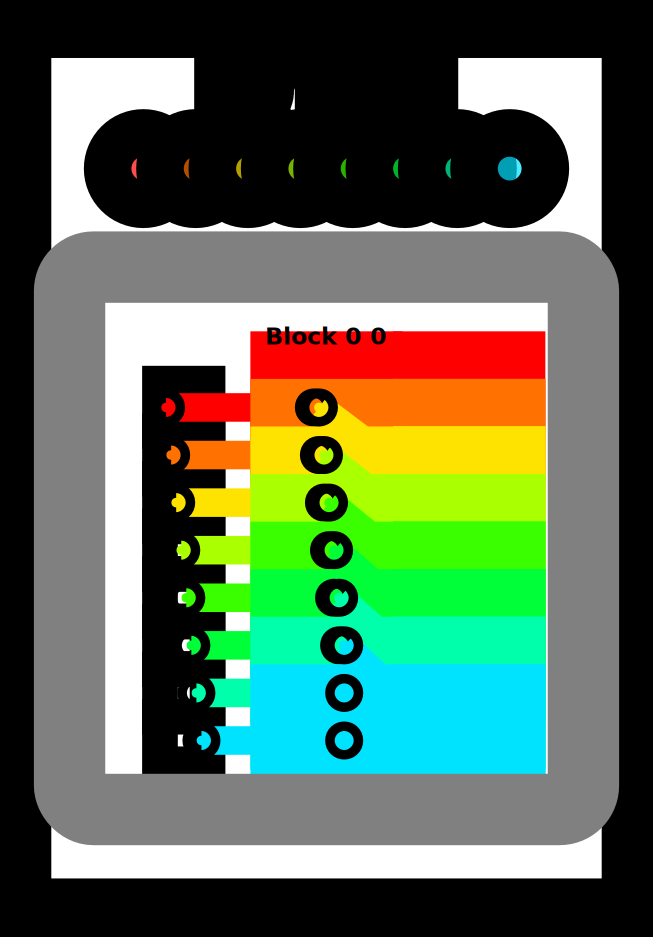

In [20]:
def pool_spec(a):
    out = np.zeros(*a.shape)
    for i in range(a.shape[0]):
        out[i] = a[max(i - 2, 0) : i + 1].sum()
    return out


TPB = 8
def pool_test(cuda):
    def call(out, a, size) -> None:
        shared = cuda.shared.array(TPB, numba.float32)
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x
        if i < size:
            shared[local_i] = a[i]
            cuda.syncthreads()
            acc = shared[local_i] 
            if i > 0:
                acc = acc + shared[local_i-1]
            if i > 1:
                acc = acc + shared[local_i-2]
            out[i] = acc

    return call


SIZE = 8
out = np.zeros(SIZE)
a = np.arange(SIZE)
problem = CudaProblem(
    "Pooling",
    pool_test,
    [a],
    out,
    [SIZE],
    threadsperblock=Coord(TPB, 1),
    blockspergrid=Coord(1, 1),
    spec=pool_spec,
)
problem.show()

In [21]:
problem.check()

Passed Tests!


## Puzzle 10 - Dot Product

# Dot
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             2 |             1 |             8 |             1 | 



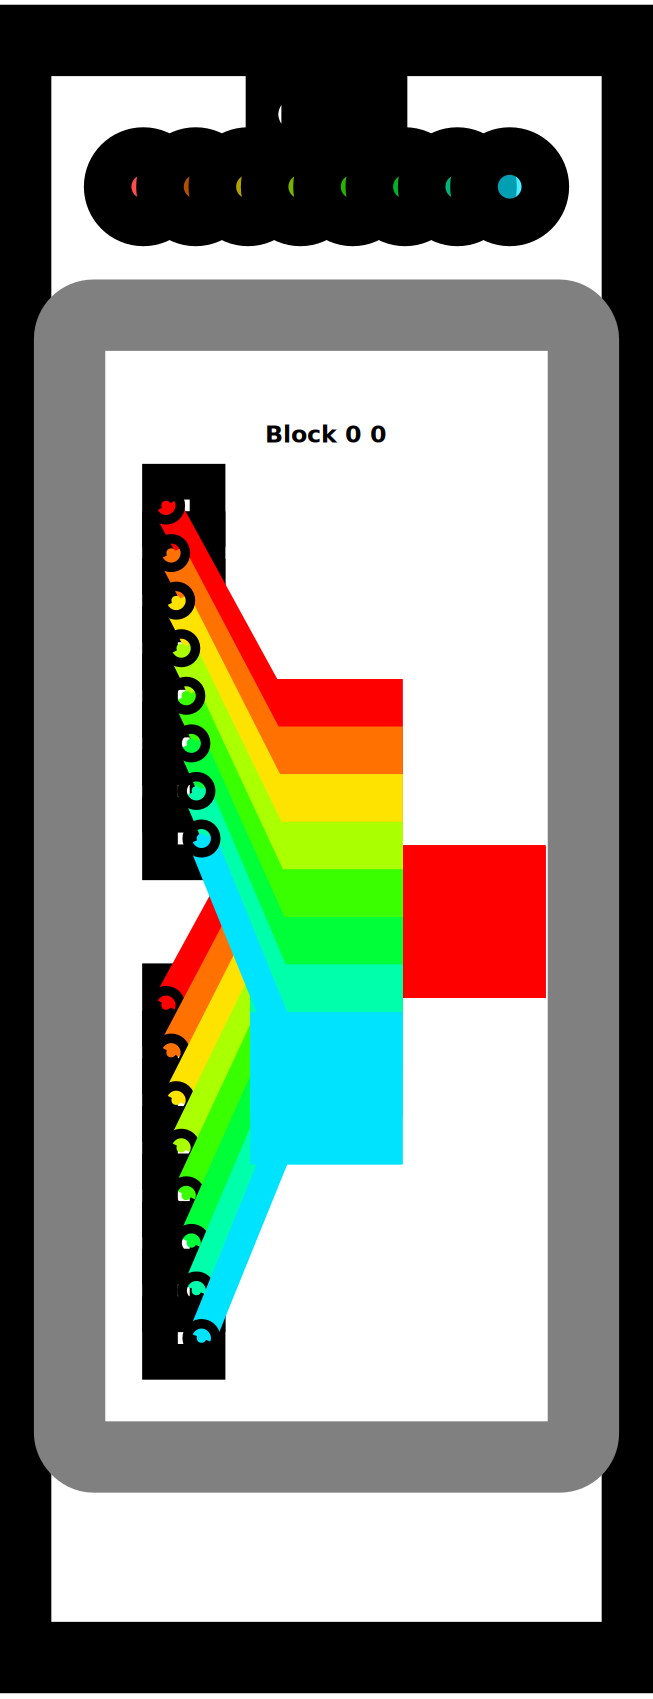

In [22]:
def dot_spec(a, b):
    return a @ b

TPB = 8
def dot_test(cuda):
    def call(out, a, b, size) -> None:
        shared = cuda.shared.array(TPB, numba.float32)

        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x
        if i < size:
            shared[local_i] = a[i] * b[i]
            cuda.syncthreads()
            if i == 0:
                acc = shared[0]
                for idx in range(1, size):
                    acc = acc + shared[idx]
                out[0] = acc
    return call


SIZE = 8
out = np.zeros(1)
a = np.arange(SIZE)
b = np.arange(SIZE)
problem = CudaProblem(
    "Dot",
    dot_test,
    [a, b],
    out,
    [SIZE],
    threadsperblock=Coord(SIZE, 1),
    blockspergrid=Coord(1, 1),
    spec=dot_spec,
)
problem.show()

In [23]:
problem.check()

Passed Tests!


## Puzzle 11 - 1D Convolution

# 1D Conv (Simple)
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             2 |             1 |             6 |             2 | 



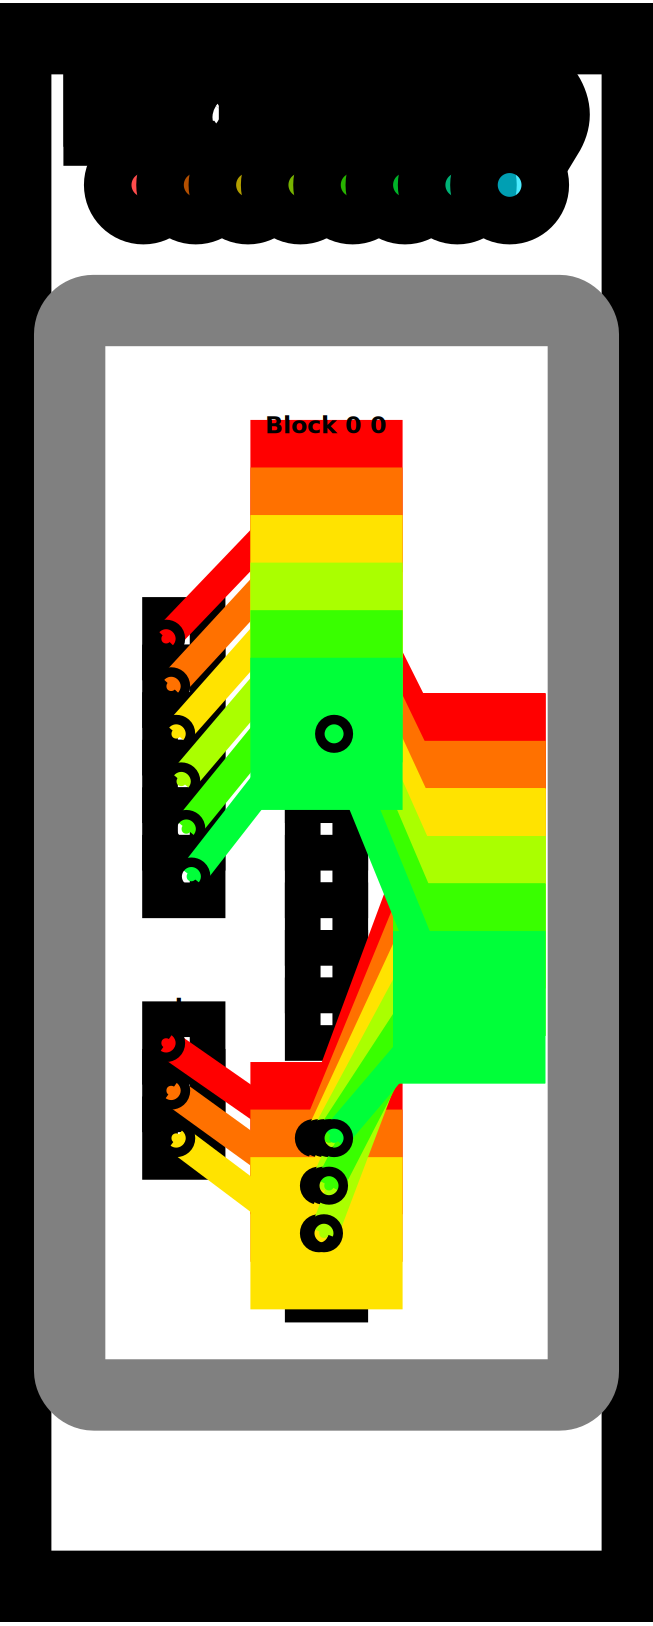

In [102]:
def conv_spec(a, b):
    out = np.zeros(*a.shape)
    len = b.shape[0]
    for i in range(a.shape[0]):
        out[i] = sum([a[i + j] * b[j] for j in range(len) if i + j < a.shape[0]])
    return out


MAX_CONV = 4
TPB = 8
TPB_MAX_CONV = TPB + MAX_CONV
def conv_test(cuda):
    def call(out, a, b, a_size, b_size) -> None:
        i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        local_i = cuda.threadIdx.x

        shared_a = cuda.shared.array(TPB_MAX_CONV, numba.float32)
        shared_b = cuda.shared.array(MAX_CONV, numba.float32)

        if local_i < b_size:
            shared_b[local_i] = b[local_i]
        if i < a_size:
            shared_a[local_i] = a[i]
            overlap_i = i + b_size
            overlap_local_i = local_i + b_size
            if overlap_local_i >= TPB and overlap_local_i + 1 < TPB_MAX_CONV and overlap_i < a_size:
                shared_a[overlap_local_i] = a[overlap_i]
            # if local_i + b_size >= TPB and overlap_local_i < TPB_MAX_CONV and i + b_size < a_size:
            #     shared_a[local_i + b_size] = a[i + b_size]
            cuda.syncthreads()
            acc = 0.0
            for conv_idx in range(0, b_size):
                if i + conv_idx < a_size:
                    acc += shared_b[conv_idx] * shared_a[local_i + conv_idx]
            out[i] = acc
        # FILL ME IN (roughly 17 lines)

    return call


# Test 1

SIZE = 6
CONV = 3
out = np.zeros(SIZE)
a = np.arange(SIZE)
b = np.arange(CONV)
problem = CudaProblem(
    "1D Conv (Simple)",
    conv_test,
    [a, b],
    out,
    [SIZE, CONV],
    Coord(1, 1),
    Coord(TPB, 1),
    spec=conv_spec,
)
problem.show()

In [103]:
problem.check()

Passed Tests!


# 1D Conv (Full)
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             2 |             1 |             8 |             2 | 



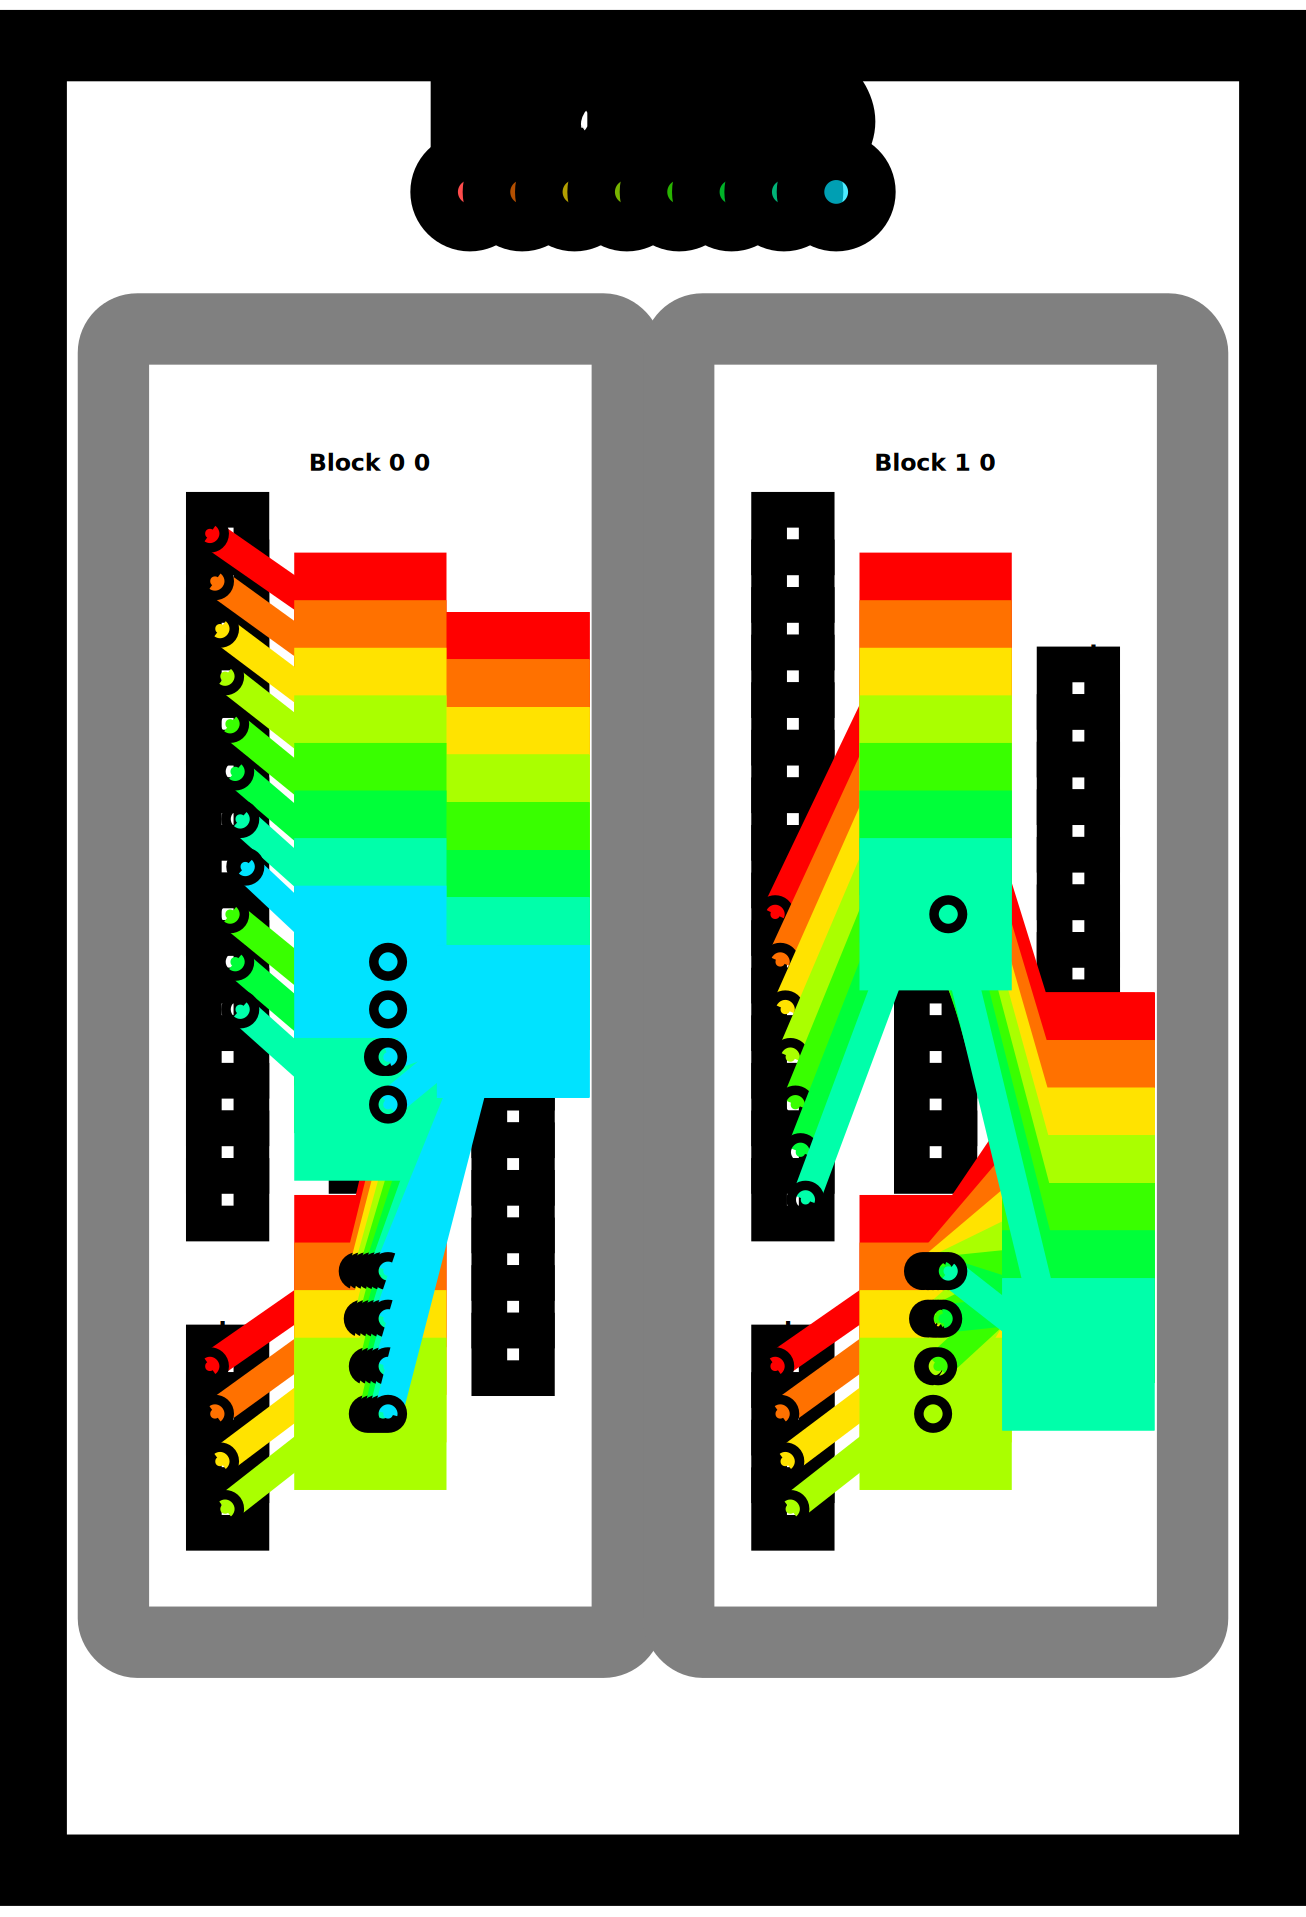

In [104]:
out = np.zeros(15)
a = np.arange(15)
b = np.arange(4)
problem = CudaProblem(
    "1D Conv (Full)",
    conv_test,
    [a, b],
    out,
    [15, 4],
    Coord(2, 1),
    Coord(TPB, 1),
    spec=conv_spec,
)
problem.show()

In [105]:
problem.check()

Passed Tests!
